### This program uses Artificial recurrent neural network LSTM to predict closing stock price

In [41]:
#importing the libraries
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [42]:
ticker = 'TSLA'

In [43]:
#getting the stock quote
df = web.DataReader(ticker,data_source='yahoo',start='2012-01-01',end='2022-10-24')
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,1.966667,1.843333,1.929333,1.872000,13921500.0,1.872000
2012-01-04,1.911333,1.833333,1.880667,1.847333,9451500.0,1.847333
2012-01-05,1.862000,1.790000,1.850667,1.808000,15082500.0,1.808000
2012-01-06,1.852667,1.760667,1.813333,1.794000,14794500.0,1.794000
2012-01-09,1.832667,1.741333,1.800000,1.816667,13455000.0,1.816667
...,...,...,...,...,...,...
2022-10-18,229.820007,217.250000,229.500000,220.190002,75891900.0,220.190002
2022-10-19,222.929993,217.779999,219.800003,222.039993,66571500.0,222.039993
2022-10-20,215.550003,202.000000,208.279999,207.279999,117798100.0,207.279999


In [44]:
#Getting the number of rows and columns in the dataset
df.shape

(2721, 6)

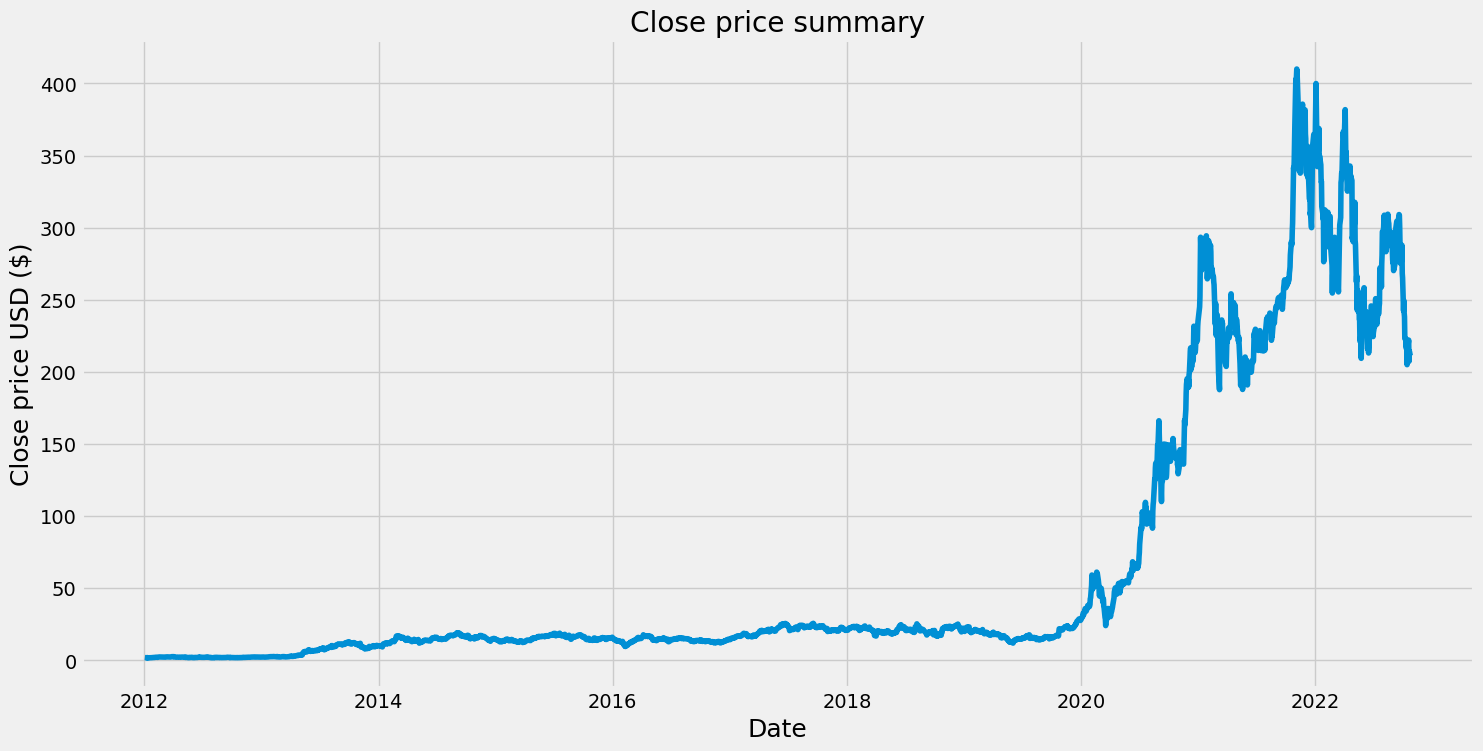

In [45]:
#visualize the closing price history
plt.figure(figsize=(16,8))
plt.title('Close price summary')
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close price USD ($)',fontsize=18)
plt.show()

In [46]:
#create a new dataframe with just the close column
data = df.filter(['Close'])
#convert the dataframe to a numpy array
dataset = data.values
#getting the number of rows to train the model on 
training_data_len = math.ceil(len(dataset)*0.8)

training_data_len

2177

In [47]:
#Scaling the data
scalar = MinMaxScaler(feature_range=(0,1))
scaled_data = scalar.fit_transform(dataset)
scaled_data

array([[0.00086343],
       [0.00080303],
       [0.00070674],
       ...,
       [0.50375892],
       [0.52128858],
       [0.51347857]])

In [48]:
#Create the training dataset
#create a scaled dataset
train_data = scaled_data[0:training_data_len, :]
#split the data into X_train and y_train datasets
X_train=[]
y_train=[]

for i in range(60,len(train_data)):
    X_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])
    if i <=60:
        print(X_train)
        print(y_train)
        print()

[array([0.00086343, 0.00080303, 0.00070674, 0.00067246, 0.00072796,
       0.00078834, 0.00088791, 0.00089117, 0.        , 0.00062186,
       0.00065614, 0.00064798, 0.00062186, 0.00064961, 0.0007557 ,
       0.00084547, 0.00100379, 0.00106745, 0.00110662, 0.00102501,
       0.00110825, 0.00121761, 0.00136451, 0.0014706 , 0.00143796,
       0.00149182, 0.00159791, 0.00135634, 0.00142   , 0.00169421,
       0.00176439, 0.00185906, 0.001988  , 0.00191129, 0.00186559,
       0.00191618, 0.00178887, 0.00176766, 0.00179867, 0.00173338,
       0.0018966 , 0.00183621, 0.00179214, 0.00168441, 0.00168605,
       0.00167789, 0.00195046, 0.00215775, 0.00217081, 0.00204023,
       0.0019929 , 0.00204513, 0.00198963, 0.00198637, 0.00201738,
       0.00189497, 0.00184274, 0.00238462, 0.00247276, 0.00245807])]
[0.0023731972591546557]



In [49]:
train_data

array([[0.00086343],
       [0.00080303],
       [0.00070674],
       ...,
       [0.32503476],
       [0.32652657],
       [0.34771722]])

In [50]:
#Convert the X_train and y_train to numpy array
X_train,y_train = np.array(X_train),np.array(y_train)

In [51]:
X_train.shape

(2117, 60)

In [52]:
#reshape the data as the LSTM expects the data to be in 3 dimensional
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))
X_train.shape

(2117, 60, 1)

### Building the LSTM model

In [53]:
model = Sequential()
model.add(LSTM(50,return_sequences=True, input_shape=(X_train.shape[1],1)))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [54]:
#Compile the model
model.compile(optimizer='adam',loss='mean_squared_error')

In [55]:
model.fit(X_train,y_train,batch_size=1,epochs=4)

Epoch 1/4
2117/2117 [==============================] - 30s 13ms/step - loss: 2.1681e-04
Epoch 2/4
2117/2117 [==============================] - 28s 13ms/step - loss: 7.6776e-05
Epoch 3/4
2117/2117 [==============================] - 28s 13ms/step - loss: 6.1184e-05
Epoch 4/4
2117/2117 [==============================] - 28s 13ms/step - loss: 4.2761e-05


In [56]:
#Creating the testing dataset
#Create a new array containing scaled value from index 2117 to 2721
test_data = scaled_data[training_data_len-60:,:]
#create the dataset X_test,y_test
X_test=[]
y_test=dataset[training_data_len:,:]

for i in range(60,len(test_data)):
    X_test.append(test_data[i-60:i,0])

In [57]:
#CONVERT THE DATA INTO A np.array
X_test = np.array(X_test)

In [58]:
X_test.shape

(544, 60)

In [59]:
#Reshaping the data
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
X_test.shape

(544, 60, 1)

In [60]:
#Getting the model predicted price value
predictions = model.predict(X_test)

17/17 [==============================] - 1s 10ms/step


In [61]:
predictions=scalar.inverse_transform(predictions)

In [62]:
#Getting the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(predictions-y_test)**2)
rmse

42.16108859286589

/var/folders/r5/3bmqd5d91l7d11d1x39m82v00000gn/T/ipykernel_7207/2628329274.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['predictions'] = predictions


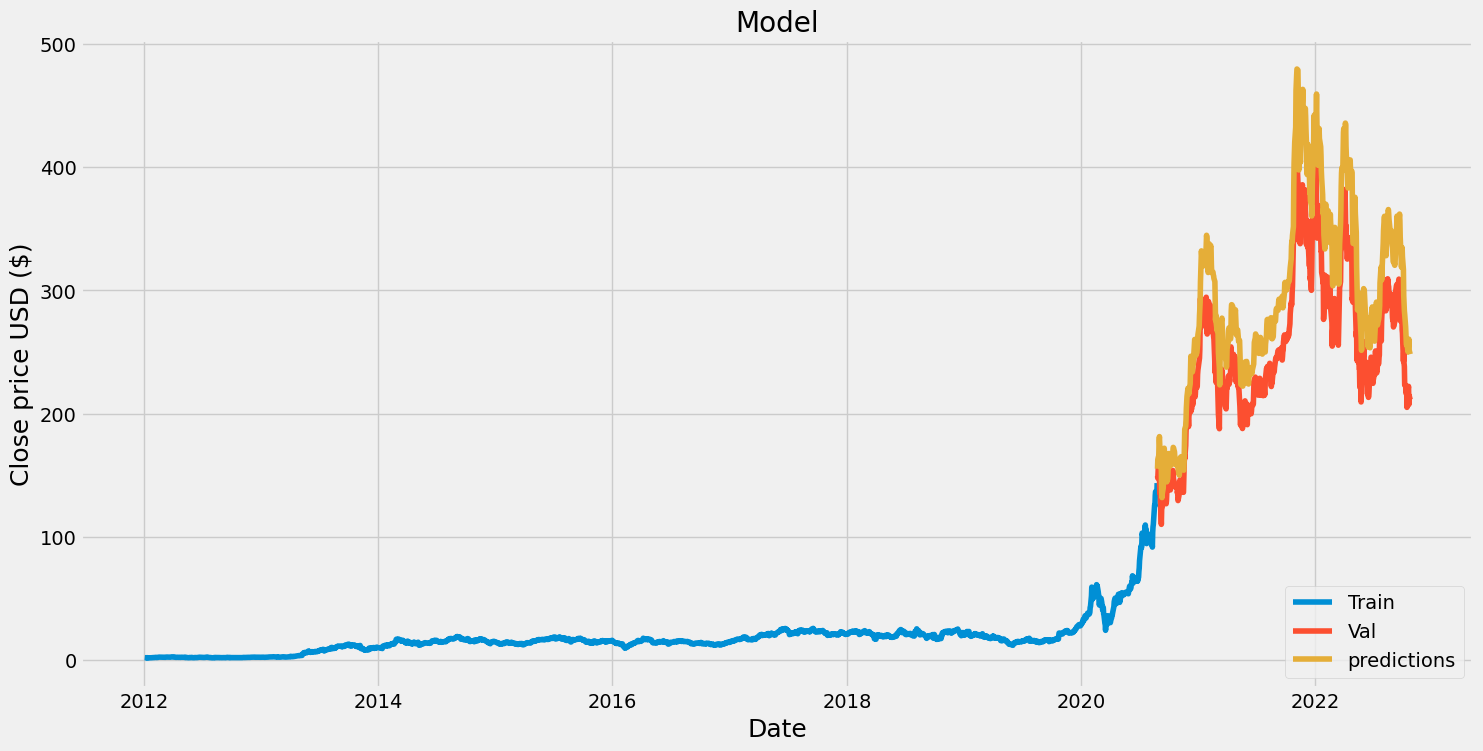

In [63]:
#plot
train = data[:training_data_len]
valid = data[training_data_len:]
valid['predictions'] = predictions
#visualize the model
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close price USD ($)',fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close','predictions']])
plt.legend(['Train','Val','predictions'],loc='lower right')
plt.show()

In [64]:
#Show the valid and predicted price
valid

,Close,predictions
Date,,
2020-08-27,149.250000,155.187607
2020-08-28,147.559998,162.481934
2020-08-31,166.106674,165.839462
2020-09-01,158.350006,177.906036
2020-09-02,149.123337,181.258713
...,...,...
2022-10-18,220.190002,252.609726
2022-10-19,222.039993,256.890839
2022-10-20,207.279999,260.325104


In [76]:
#Get the quote 
Stock_quote = web.DataReader(ticker,data_source='yahoo',start='2020-01-01',end='2022-10-24')
#Create a new dataframe
new_df = Stock_quote.filter(['Close'])
#get the last 60 day closing values and convert the dataframe to an array
last_60_days = new_df[-60:].values
#scale the data to values between 0 and 1
last_60_days_scaled = scalar.transform(last_60_days)
#create an empty list
X_test = []
#append the past 60 days
X_test.append(last_60_days_scaled)
#Convert the X_test dataset to numpy array
X_test = np.array(X_test)
#Reshape the data to 3D
X_test == np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
#get the predicted price
pred_price = model.predict(X_test)
#Undo scaling
pred_price = scalar.inverse_transform(pred_price)
print(pred_price)

1/1 [==============================] - 0s 17ms/step
[[245.83473]]


In [84]:
from datetime import date

today = date.today()
print("Today's date:", today)


Today's date: 2022-10-24


In [85]:
Stock_quote2 = web.DataReader(ticker,data_source='yahoo',start=today,end=today)
print(Stock_quote2['Close'])

Date
2022-10-24    211.25
Name: Close, dtype: float64


In [96]:
Price_difference = pred_price[0]-Stock_quote2['Close']
print('Based on this analysis, there is a price difference of ${:.2f} from the predicted cost to the actual cost.'.format(Price_difference[0]))

Based on this analysis, there is a price difference of $34.58 from the predicted cost to the actual cost.
